# 画像のクラス分類２

今回はMNISTよりも難易度の高いCifar10とよばれる１０種類の画像分類を行いましょう。

ここでは、どのようなモデルの設計にすると精度が上がるのかといった検証を行っていただきます。

## 必要なモジュールの読み込み

numpyなどのライブラリやkerasでよく使うものは最初の段階で読み込んでおくと良いでしょう。

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 

In [2]:
# Pythonの挙動を整えるライブラリのインポート
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow と tf.keras のインポート
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.0.0


## データセットの準備
cifar10と呼ばれる有名なデータセットはkeras側ですでに用意されているため、今回はこちらを使いましょう。
こちらでは、kerasで使用できるデータセットの形式で最初から読み込むことができるため、モデル構築の練習に専念することができます。

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(train_x, train_t), (test_x, test_t) = cifar10.load_data()

In [5]:
len(train_x)

50000

In [6]:
len(test_x)

10000

## データセットの確認
どのようなデータを使用しているのかを確認しておく癖をつけておきましょう。

In [7]:
train_x.shape

(50000, 32, 32, 3)

In [8]:
type(train_x)

numpy.ndarray

In [9]:
train_x.dtype

dtype('uint8')

このようにtrain_xには画像が入っています。  
実際にプロットして確認してみましょう。少しわかりにくいですが、こちらはカエルです。

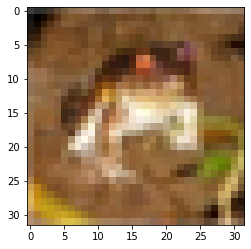

In [10]:
plt.imshow(train_x[0])

train_tも確認しましょう。

In [11]:
train_t.shape

(50000, 1)

In [12]:
type(train_t)

numpy.ndarray

In [13]:
train_t.dtype

dtype('uint8')

In [14]:
train_t[0]

array([6], dtype=uint8)

In [15]:
train_t.shape

(50000, 1)

こちらのようにtrain_tはラベルであることがわかります。

### データの整形
入力データの正規化と教師データのone-hotベクトル化を行いましょう。

In [16]:
from tensorflow.keras.utils import to_categorical

# 特徴量の正規化
train_x = train_x / 255
test_x = test_x / 255

# クラスラベルのone-hotベクトル化
num_classes = 10
train_t = to_categorical(train_t, num_classes)
test_t =  to_categorical(test_t, num_classes)

##  モデルの定義
今回はVGG16と呼ばれるImageNetのコンペティションで良い成績を上げた画像向けのCNNモデルを定義していきます。

## シードの固定

In [17]:
import os
import random

def reset_seed(seed=0):
    
    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed) #　random関数のシードを固定
    np.random.seed(seed) #numpyのシードを固定
    tf.random.set_seed(seed) #tensorflowのシードを固定

## CNNモデルの定義

In [18]:
# 必要なモジュールのインポート
from tensorflow.keras import models,layers

In [19]:
# シードの固定  => cuDNNの固定は？？
np.random.seed(0)

model = models.Sequential()

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [20]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])

In [21]:
epoch = 50
batchsize = 1024

# 学習
model.fit(train_x, train_t,
          batch_size=batchsize,
          epochs=epoch,
          verbose=1,
          validation_data=(test_x, test_t))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 138s 3ms/sample - loss: 3.2402 - accuracy: 0.1428 - val_loss: 2.3286 - val_accuracy: 0.1000
Epoch 2/50
50000/50000 [==============================] - 97s 2ms/sample - loss: 2.6259 - accuracy: 0.2028 - val_loss: 2.3810 - val_accuracy: 0.1233
Epoch 3/50
50000/50000 [==============================] - 97s 2ms/sample - loss: 2.3315 - accuracy: 0.2458 - val_loss: 2.3722 - val_accuracy: 0.0993
Epoch 4/50
50000/50000 [==============================] - 97s 2ms/sample - loss: 2.1830 - accuracy: 0.2769 - val_loss: 2.3318 - val_accuracy: 0.1003
Epoch 5/50
50000/50000 [==============================] - 97s 2ms/sample - loss: 2.0526 - accuracy: 0.2968 - val_loss: 2.4554 - val_accuracy: 0.1018
Epoch 6/50
50000/50000 [==============================] - 97s 2ms/sample - loss: 1.9733 - accuracy: 0.3211 - val_loss: 2.7911 - val_accuracy: 0.1157
Epoch 7/50
50000/50000 [==============================]

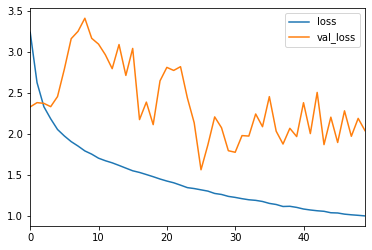

In [22]:
# 学習結果をPandasのDataFrame型で読み込みます。
results = pd.DataFrame(model.history.history)

# loss（損失関数）を表示
results[['loss', 'val_loss']].plot()

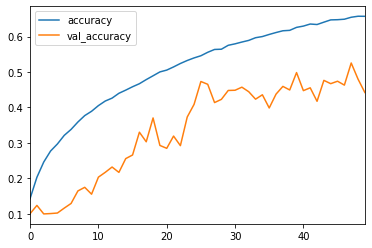

In [23]:
# accuracy（精度）を表示
results[['accuracy', 'val_accuracy']].plot()